In [1]:
# Ramendra Kumar
## Logistic regression(Binary classification)Example
## Gradient Descent algorithm without using optimization library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We are importing a dataset which include marks of two subject of applicants for admission in a university and labelling of getting admission as 1 and not getting admission as 0 based
on that marks.

In [5]:
data=pd.read_csv('ex2data1.txt',header=None)
data.head()
## Below is example of the way to load the file with path 
# data.to_csv(r'C:\Users\Ramendra\Desktop\Data Analysis Theory\clgAdmission.csv')

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


##### Seperating data in two group: one for all Y=0 and another for all Y=1 and Plotting 

<function matplotlib.pyplot.show(*args, **kw)>

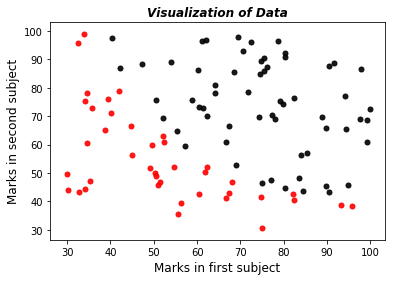

In [6]:
data1=data[data[2]!=0]
data2=data[data[2]==0]
plt.scatter(data1[0],data1[1],color='K',s=25,marker='o',alpha=0.9) #All the data with Y=1,represented by Black,Admitted
plt.scatter(data2[0],data2[1],color='R',s=25,marker='o',alpha=0.9) # All data with Y=0 ,represented by Red,Rejected
plt.title('Visualization of Data',fontsize=12,style='italic',fontweight='bold')
plt.xlabel('Marks in first subject',fontsize=12)
plt.ylabel('Marks in second subject',fontsize=12)
plt.show


In [191]:
Xn=data.iloc[:,[0,1]]
MeanX=np.mean(Xn)
StdX=np.std(Xn)
Xn=(Xn-MeanX)/StdX ## Feature scaling and normalization
Y=data.iloc[:,[2]]
m=len(Y)

In [177]:
ones=np.ones((m,1))
X=(np.hstack((ones,Xn))).T  # shape of resulting X (3,100)


In [179]:
theta_inl=np.zeros((3,1))

In [180]:
def sigmoid_f(theta,X):
    z=theta.T.dot(X)
    temp=1/(1+np.exp(-z))
    return temp.T  # shape of temp (m,1)

In [181]:
sigmoid_f(theta_inl,X)

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
      

In [182]:
## function for gradient calcualtion
def gradient_cal(theta,X,Y):
    h_theta=sigmoid_f(theta,X)
    temp1=h_theta-Y
    temp2=(X.dot(temp1))
    return temp2

In [183]:
gradient_cal(theta_inl,X,Y)

array([[-10.        ],
       [-28.12291353],
       [-25.09861459]])

In [184]:
## function for cost calcualtion and updating paratmeter
def cost_cal(theta,X,Y):
    H_theta=sigmoid_f(theta,X)
    costf=(-1/m)*(Y.T.dot(np.log(H_theta))+(1-Y.T).dot(np.log(1-H_theta)))
    return costf

In [185]:
cost_cal(theta_inl,X,Y)

,0
2,0.693147


In [186]:
theta_inl=np.zeros((3,1))## Paratmeter initialization as zero's
alpha=0.001 ## learning rate
iteration=100000
## Aplication of gradient descent algorithm 
cost=np.zeros((iteration,1))
for i in range(iteration):
    grad=gradient_cal(theta_inl,X,Y)
    cost[i]=cost_cal(theta_inl,X,Y)
    theta_inl+=-(alpha/m)*grad
   
    

<function matplotlib.pyplot.show(*args, **kw)>

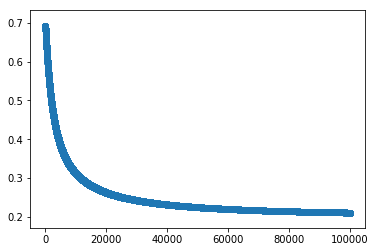

In [187]:
## Plotting iteration vs cost
xa=np.arange(iteration)
plt.scatter(xa,cost)
plt.show

In [189]:
cost[-1]

array([0.21054066])

In [188]:
theta_inl

array([[1.27065455],
       [3.0472347 ],
       [2.8115401 ]])

##### Overal Accuracy of the model 

In [190]:
Y_pred=sigmoid_f(theta_inl,X)
Y_pred=np.where(Y_pred>=0.5,1,0)
Ycheck=np.array(Y)
# Calculating accuracy percentage
sum=0
for i in range(m):
    if Ycheck[i]!=Y_pred[i]:
        sum+=1
        
print('Accuracy Percentage: ',end='')
Ac_P=(m-sum)*100/m
print(str(Ac_P)+' %')

Accuracy Percentage: 89.0 %


##### Prediction for unknown  input 

In [213]:
xtest=np.array([45,85])# input the marks of first and second subject as first and second element of xtest: ex.45 and 75
Xmodi=(xtest-np.array(MeanX))/np.array(StdX)
ones=np.ones((1))
Xt=np.hstack((ones,Xmodi))
Y_pred=sigmoid_f(theta_inl,Xt.T)
Y_pred

array([0.70615482])

Since the Y_pred value is greater than 0.5 it is 1 and got admission.

#### Happy Learning ! Best of Luck!!'
#### Do it with Passion or not at all !!!